In [27]:
# Importing all necessary libraries for data handling, visualization, and machine learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [28]:
# Loading the IMDB dataset CSV file 
df = pd.read_csv(r"C:\Users\SHARANIA T\Downloads\archive\IMDB dataset.csv")

In [3]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [29]:
# Checking how many positive and negative reviews are in the dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<Figure size 800x600 with 0 Axes>

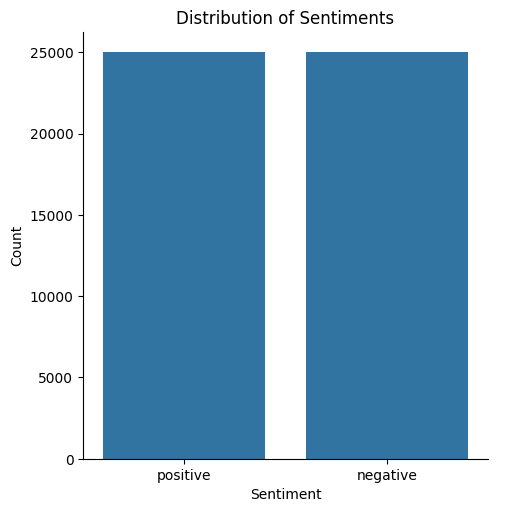

In [16]:
plt.figure(figsize=(8, 6))
sns.catplot(x='sentiment', kind='count', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

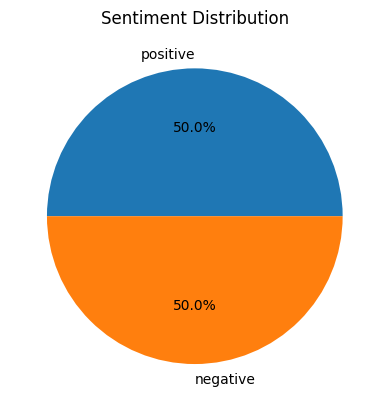

In [17]:
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [18]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [30]:
# Loading English stopwords (common words like 'the', 'is', etc.)
stop_words = set(stopwords.words('english'))

In [31]:
# Function to clean and preprocess each review
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [33]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [34]:
# Convert the cleaned text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.7)
X = vectorizer.fit_transform(df['cleaned_review'])
# Extract target labels (positive/negative)
y = df['sentiment']

In [35]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Create and train a Logistic Regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Use the trained model to predict the sentiment of test reviews
y_pred = model.predict(X_test)

In [38]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8956

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion Matrix:
[[4368  593]
 [ 451 4588]]
